<a href="https://colab.research.google.com/github/Danecono2016/assign1/blob/main/Yet_another_copy_of_Yet_another_copy_of_12_01_(3_sets_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Important libraries

In [ ]:
import os
import zipfile
import random
import shutil
import numpy as np
from shutil import copyfile
from PIL import Image
import math
import json
import base64
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io
from google.colab import files
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model

In [ ]:
!pip install kaggle # Install the Kaggle API client

The group used Kaggle to upload data sets

In [ ]:
# Upload kaggle.json using the file explorer
#drive.mount('/content/drive')
files.upload()
!ls -lha kaggle.json
!pip install kaggle
!pip install -q kaggle
#The kaggle API client expects the file to be in ~/.kaggle, so move it there
!chmod 600 /root/.kaggle/kaggle.json
#check your directory before downloading the datasets
!pwd #Print Working Directory
!mkdir -p ~/.kaggle #Create the directory
!cp kaggle.json ~/.kaggle/
# Test the Kaggle API (optional)
!kaggle datasets list
!kaggle datasets download  danniee/food-classes

Saving kaggle.json to kaggle.json
-rw-r--r-- 1 root root 63 Nov 23 13:01 kaggle.json
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
/content
ref                                                           title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadroshaanriaz/students-performance-dataset-cleaned      Students Performance | Clean Dataset             10KB  2024-10-29 19:32:26           9190        170  1.0              
steve1215rogg/student-lifestyle-dataset                       student lifestyle dataset                        22KB  2024-11-11 19:11:28           4304         64  1.0              
brsahan/vehicle-co2-emissions-dataset                         Vehicle CO2 Emissions Dataset           

In [ ]:
# Import necessary libraries
import os
import shutil
import random
from shutil import copyfile
from PIL import Image

# Function to create a directory if it doesn't exist, otherwise recreate it
def make_dir(PATH):
    if not os.path.exists(PATH):
        os.mkdir(PATH)
        return PATH
    else:
        shutil.rmtree(PATH)
        os.mkdir(PATH)
        return PATH

# Create directories for the dataset
try:
    base_dir = '/tmp'
    fruit_dir = make_dir(os.path.join(base_dir, 'fruit-dataset'))
    train_dir = make_dir(os.path.join(fruit_dir, 'train'))
    validation_dir = make_dir(os.path.join(fruit_dir, 'val'))
    test_dir = make_dir(os.path.join(fruit_dir, 'test'))
    preview_dir = make_dir(os.path.join(fruit_dir, 'preview'))

    train_fresh_dir = make_dir(os.path.join(train_dir, 'Fresh Fruit'))

    train_rotten_dir = make_dir(os.path.join(train_dir, 'Rotten Fruit'))


    validation_fresh_dir = make_dir(os.path.join(validation_dir, 'Fresh Fruit'))

    validation_rotten_dir = make_dir(os.path.join(validation_dir, 'Rotten Fruit'))

    test_fresh_dir = make_dir(os.path.join(test_dir, 'Fresh Fruit'))

    test_rotten_dir = make_dir(os.path.join(test_dir, 'Rotten Fruit'))

except OSError:
    pass

# Function to split data into training and validation sets
def split_data(SOURCE='', TRAINING='', VALIDATION='', SPLIT_SIZE=0):
    data = os.listdir(SOURCE)
    random_data = random.sample(data, len(data))

    train_size = len(data) * SPLIT_SIZE

    for i, filename in enumerate(random_data):
        filepath = os.path.join(SOURCE, filename)
        if os.path.getsize(filepath) > 0:
            if i < train_size:
                copyfile(filepath, os.path.join(TRAINING, filename))
            else:
                copyfile(filepath, os.path.join(VALIDATION, filename))

# Update the dataset directory paths to the downloaded dataset location
dataset_train_dir = '/tmp/Dataset/Train'
dataset_test_dir = '/tmp/Dataset/Test'

fapples_train_dir = os.path.join(dataset_train_dir, 'ripeapples')
ftomatoes_train_dir = os.path.join(dataset_train_dir, 'ripetomatoes')

rapples_train_dir = os.path.join(dataset_train_dir, 'rottenapples')
rtomatoes_train_dir = os.path.join(dataset_train_dir, 'rottentomatoes')




# Create paths for each category in the test dataset
fapples_test_dir = os.path.join(dataset_test_dir, 'ripeapples')
ftomatoes_test_dir = os.path.join(dataset_test_dir, 'ripetomatoes')

rapples_test_dir = os.path.join(dataset_test_dir, 'rottenapples')
rtomatoes_test_dir = os.path.join(dataset_test_dir, 'rottentomatoes')

In [ ]:

# Set Kaggle API credentials (assuming kaggle.json is in ~/.kaggle/)
os.environ['KAGGLE_CONFIG_DIR'] = os.path.expanduser("~/.kaggle")  # Update this path if your kaggle.json is stored elsewhere

# Download the dataset using Kaggle API
!kaggle datasets download -d danniee/food-classes -p /tmp --unzip

# Function to create a directory if it doesn't exist, otherwise recreate it
def make_dir(PATH):
    if not os.path.exists(PATH):
        os.mkdir(PATH)
        return PATH
    else:
        shutil.rmtree(PATH)
        os.mkdir(PATH)
        return PATH


Dataset URL: https://www.kaggle.com/datasets/danniee/food-classes
License(s): unknown
 99% 1.00G/1.01G [00:03<00:00, 293MB/s]
100% 1.01G/1.01G [00:03<00:00, 280MB/s]


In [ ]:
TRAIN_PATH = '/tmp/Dataset/Train'
TEST_PATH = '/tmp/Dataset/Test'
SIZE = (240, 240)

In [ ]:
labels = []
for class_ in os.listdir(TRAIN_PATH):
    labels.append(class_)
NUM_LABELS = len(labels)

print(labels)


['rottentomatoes', 'rottenapples', 'ripeapples', 'ripetomatoes']


In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
test_datagen = ImageDataGenerator(rescale=1./255)

'''
Comments:
- ImageDataGenerator will resize all images to target_size
- x_col is the column where the images' names are
- y_col is the column where the labels are
- has_ext means that the images' names include a file extension, e.g. image_name.jpg
- Here you can change the targe_size to resize all images to different shapes.
Maybe larger images help in getting a better accuracy
'''
train_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=SIZE,
                                                 subset="training",
                                                 class_mode='categorical')

val_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TEST_PATH ,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=SIZE,
                                                 subset="validation",
                                                 class_mode='categorical')

Found 8967 images belonging to 4 classes.
Found 99 images belonging to 4 classes.


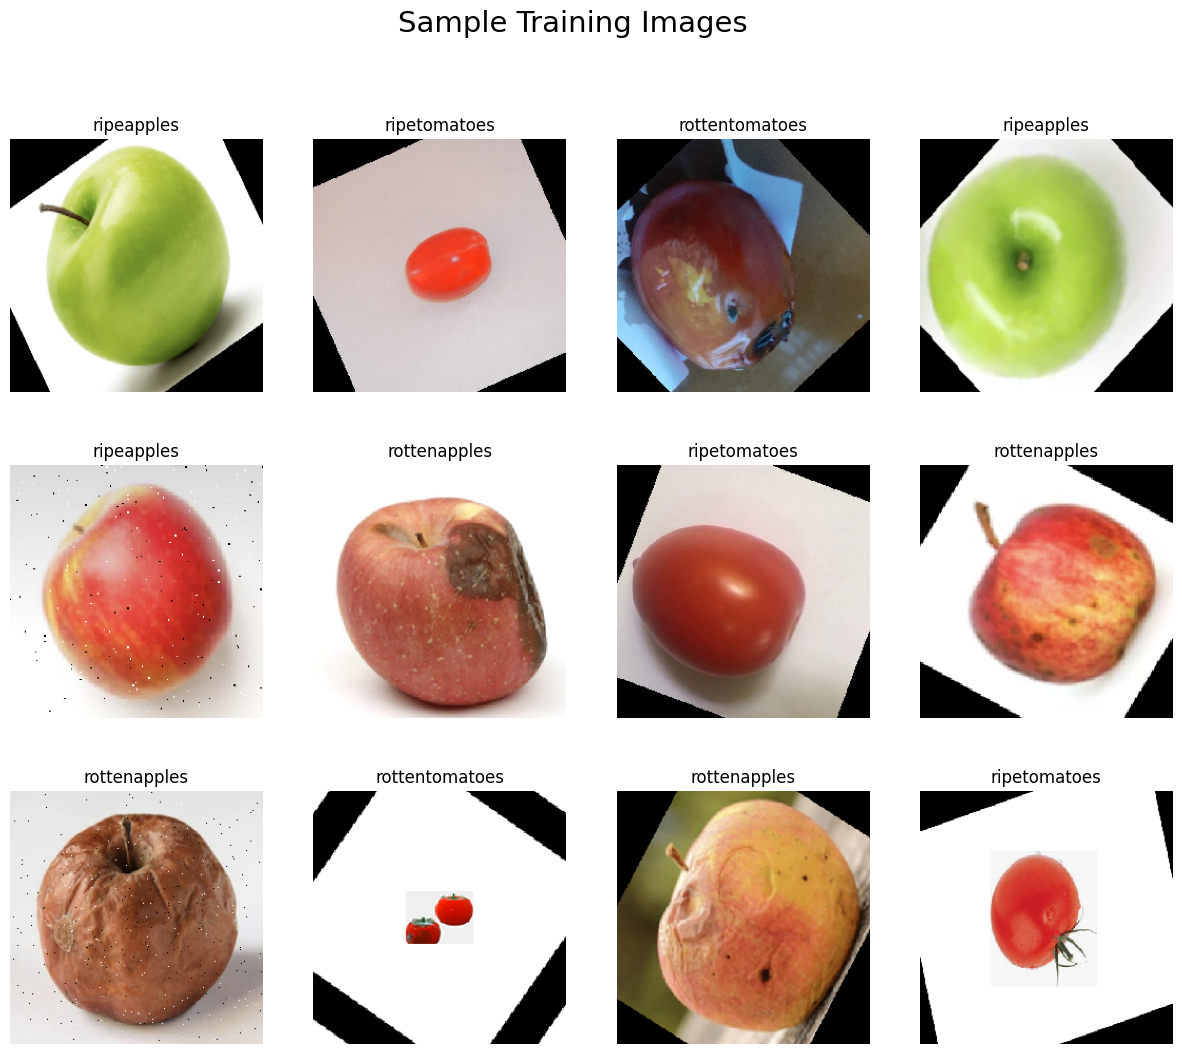

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
idx = 0

for i in range(3):
    for j in range(4):
        label = labels[np.argmax(train_dataset[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_dataset[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

# plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [ ]:
from keras.applications.densenet import DenseNet121

DenseNet121 is pre built CNNN architrecture

In [ ]:
from tensorflow.keras.applications import Xception, VGG16, InceptionV3,DenseNet121
from keras.layers import Input
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import pandas as pd
from tensorflow.keras.applications import Xception, VGG16, InceptionV3,DenseNet121
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import pandas as pd

model= DenseNet121(
    include_top=True,
    weights=None,
    input_tensor=Input(shape=(240, 240, 3)),
    input_shape=None,
    pooling=None,
    classes=NUM_LABELS,
)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam

from keras.callbacks import ModelCheckpoint


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model.summary()
epochs = 15
stepsperepoch=180
validationsteps=1
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
es = EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=100)
mc = ModelCheckpoint("densenet121.keras", monitor='val_loss',save_best_only=True, mode='min',verbose=1)

In [ ]:
train_len = 0
for foldername in os.listdir(TRAIN_PATH):
    train_len = train_len + len(os.listdir(os.path.join(TRAIN_PATH,foldername)))

val_len = 0
for foldername in os.listdir(TEST_PATH):
    val_len = val_len + len(os.listdir(os.path.join(TEST_PATH,foldername)))

print(train_len)
print(val_len)

9961
1006


In [ ]:

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 98):
      print("\nReached 98% accuracy. Stop Training")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
'''hist = model.fit(
    train_dataset,
    epochs=epochs,
    callbacks=[callbacks],
    steps_per_epoch=(train_len)//32,
    validation_data=val_dataset,
    validation_steps = validationsteps
)'''

'hist = model.fit(\n    train_dataset,\n    epochs=epochs,\n    callbacks=[callbacks],\n    steps_per_epoch=(train_len)//32,\n    validation_data=val_dataset,\n    validation_steps = validationsteps\n)'

In [ ]:
    hist = model.fit(
    train_dataset,
    epochs=epochs,
    callbacks=[annealer,mc,es],
    steps_per_epoch=stepsperepoch,
    validation_data=val_dataset,
    validation_batch_size= validationsteps
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.7595 - loss: 0.5924
Epoch 1: val_loss improved from inf to 2.92133, saving model to densenet121.keras
180/180 ━━━━━━━━━━━━━━━━━━━━ 1389s 7s/step - accuracy: 0.7599 - loss: 0.5915 - val_accuracy: 0.3333 - val_loss: 2.9213 - learning_rate: 0.0010
Epoch 2/15
101/180 ━━━━━━━━━━━━━━━━━━━━ 9:29 7s/step - accuracy: 0.8935 - loss: 0.2767

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss did not improve from 2.92133
180/180 ━━━━━━━━━━━━━━━━━━━━ 733s 4s/step - accuracy: 0.8908 - loss: 0.2786 - val_accuracy: 0.5758 - val_loss: 3.0081 - learning_rate: 9.5000e-04
Epoch 3/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9052 - loss: 0.2488
Epoch 3: val_loss did not improve from 2.92133
180/180 ━━━━━━━━━━━━━━━━━━━━ 1298s 7s/step - accuracy: 0.9052 - loss: 0.2488 - val_accuracy: 0.5253 - val_loss: 11.6481 - learning_rate: 9.0250e-04
Epoch 4/15
101/180 ━━━━━━━━━━━━━━━━━━━━ 9:16 7s/step - accuracy: 0.9192 - loss: 0.2051
Epoch 4: val_loss did not improve from 2.92133
180/180 ━━━━━━━━━━━━━━━━━━━━ 716s 4s/step - accuracy: 0.9168 - loss: 0.2128 - val_accuracy: 0.4646 - val_loss: 32.2698 - learning_rate: 8.5737e-04
Epoch 5/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9270 - loss: 0.1829
Epoch 5: val_loss did not improve from 2.92133
180/180 ━━━━━━━━━━━━━━━━━━━━ 1266s 7s/step - accuracy: 0.9270 - loss: 0.1829 - val_accuracy: 0.3838 - val_loss: 6

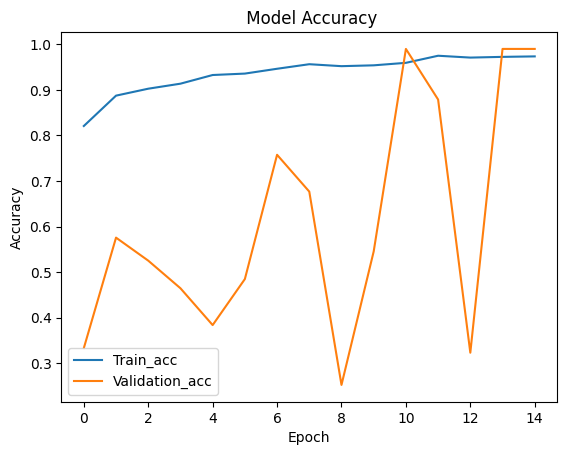

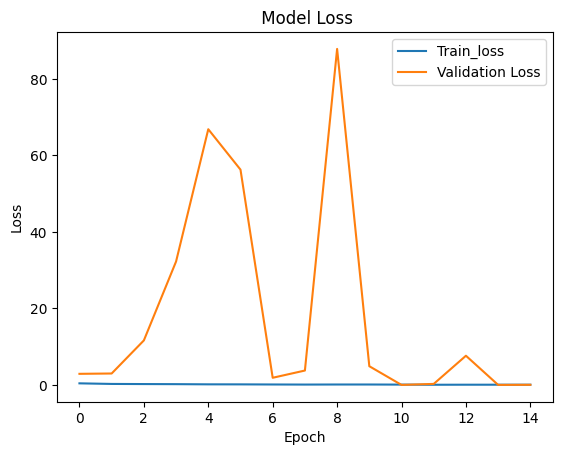

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title(' Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train_acc","Validation_acc"])
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title(' Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train_loss","Validation Loss"])
plt.show()

In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(TEST_PATH,
                                                  batch_size=1,
                                                  target_size=SIZE,
                                                  shuffle = False,
                                                  classes=labels,
                                                  class_mode='categorical')


filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 1006 images belonging to 4 classes.
   2/1006 ━━━━━━━━━━━━━━━━━━━━ 1:24 84ms/step - accuracy: 1.0000 - loss: 1.2214e-04 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1006/1006 ━━━━━━━━━━━━━━━━━━━━ 86s 85ms/step - accuracy: 0.9364 - loss: 0.3249
accuracy test:  0.9155069589614868
loss test:  0.41304144263267517


In [25]:
model.save('model.h5')

In [ ]:
from keras.utils import get_file
import pathlib
import cv2

model_predict = tf.keras.models.load_model('model.h5')
model_predict.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

uploaded = files.upload()
image_name = []
image_conf = []
predict_result = []

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, color_mode="rgb", target_size=(240, 240), interpolation="nearest")
  # imgplot = plt.imshow(img)
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  images = np.vstack([img])
  classes = model_predict.predict(images, batch_size=10)
  label = np.where(classes[0] > 0.5, 1,0)
  # print(label)
  # Instead of using `if label == 0:`
  # Check if any element in 'label' is equal to 0


  if (label == 0).any(): # Use .any() for at least one element matching the condition
    image_name.append(fn)
    image_conf.append(1.0 - classes[0])
    predict_result.append('Fresh Fruit')
  else:
    image_name.append(fn)
    image_conf.append(classes[0])
    predict_result.append('Rotten Fruit')

plt.figure(figsize=(15, 15))
for n in range(len(image_name)):
  plt.subplot((len(image_name)//4)+1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(image_name[n], color_mode="rgb", target_size=(240, 240), interpolation="nearest"))
  # Access the first element of image_conf[n] for the confidence score
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n][0])*100, 2)}%)"
  if predict_result[n] == 'Fresh Fruit':
    plt.title(title, color='black')
  else:
    plt.title(title, color='red')

  plt.axis('off')
plt.show()

for fn in image_name:
  os.system(f'rm {fn}')

## Predict Image

In [26]:
predictions = model.predict(test_generator)
files=test_generator.filenames
class_dict=test_generator.class_indices # a dictionary of the form class name: class index
rev_dict={}
for key, value in class_dict.items():
    rev_dict[value]=key

for i, p in enumerate(predictions):
    index=np.argmax(p)
    klass=rev_dict[index]
    prob=p[index]

1006/1006 ━━━━━━━━━━━━━━━━━━━━ 90s 86ms/step


In [27]:
print(len(test_generator[0][0]))
print(test_generator[0][1].shape)

1
(1, 4)


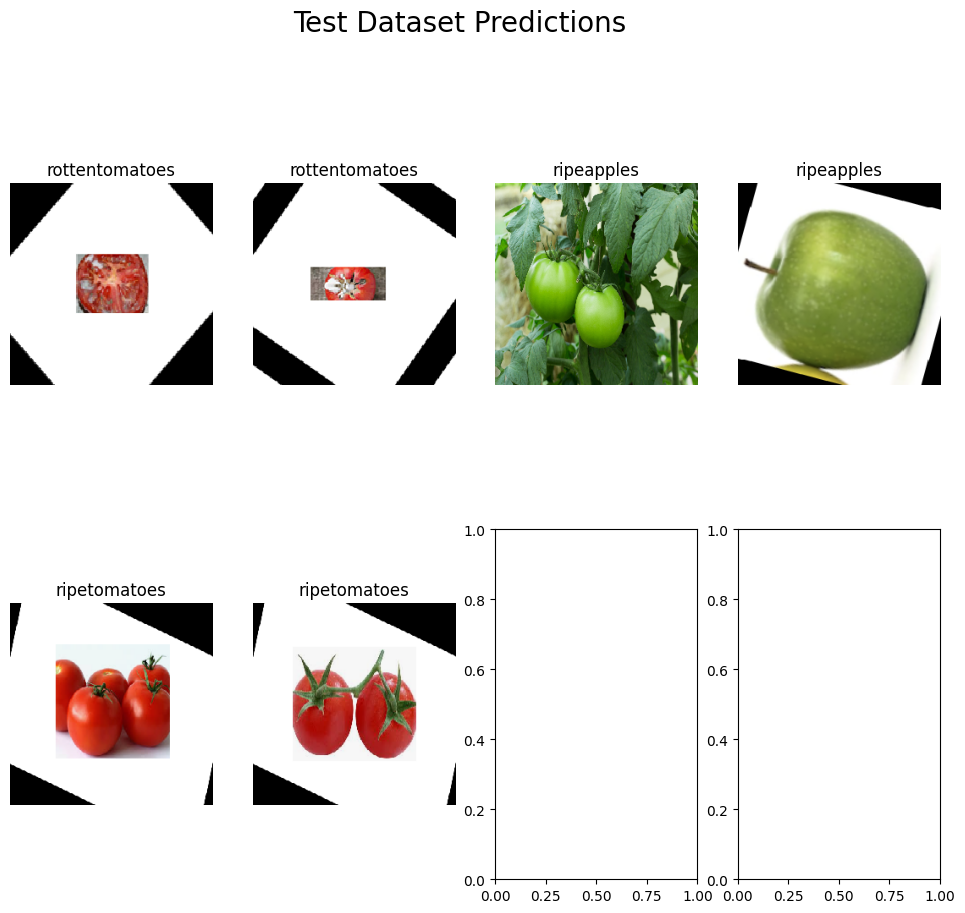

In [28]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))
idx = 0

for i in range(3):
    for j in range(4):
        # Ensure idx is within the bounds of predictions
        if idx < len(predictions):
            predicted_label = labels[np.argmax(predictions[idx])]
            ax[i, j].set_title(f"{predicted_label}")
            # Assuming your test_generator returns images in the shape (240, 240, 3)
            ax[i, j].imshow(test_generator[idx // test_generator.batch_size][0][idx % test_generator.batch_size].reshape(240, 240, 3))
            ax[i, j].axis("off")
            idx += 200 # or any desired step
        else:
            # Handle cases where idx exceeds predictions length, e.g., break or pass
            break

# plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [29]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 39.2 MB/s eta 0:00:00


In [30]:
from tensorflow.keras import layers
from collections import defaultdict
# from PIL import ImageFont
# font = ImageFont.truetype("arial.ttf", 12)
color_map = defaultdict(dict) #customize the colours
color_map[layers.Conv2D]['fill'] = '#00f5d4'
color_map[layers.MaxPooling2D]['fill'] = '#8338ec'
color_map[layers.Dropout]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#ffbe0b'
# visualkeras.layered_view(model, legend=True,color_map=color_map,scale_xy=2, scale_z=1, max_z=200)

In [31]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

<ipython-input-31-96f95e6a42c8>:1: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


In [32]:
predictions = model.predict(test_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
'''
predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)'''

1006/1006 ━━━━━━━━━━━━━━━━━━━━ 85s 85ms/step


'\npredictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)\n# Get most likely class\npredicted_classes = np.argmax(predictions, axis=1)'

In [33]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                precision    recall  f1-score   support

rottentomatoes       0.99      1.00      0.99       263
  rottenapples       0.91      0.75      0.82       263
    ripeapples       0.83      0.92      0.87       227
  ripetomatoes       0.93      1.00      0.96       253

      accuracy                           0.92      1006
     macro avg       0.91      0.92      0.91      1006
  weighted avg       0.92      0.92      0.91      1006



In [35]:
print('Confusion Matrix')
# print(confusion_matrix(test_generator.classes, predicted_classes))
cm = confusion_matrix(test_generator.classes, predicted_classes)

Confusion Matrix


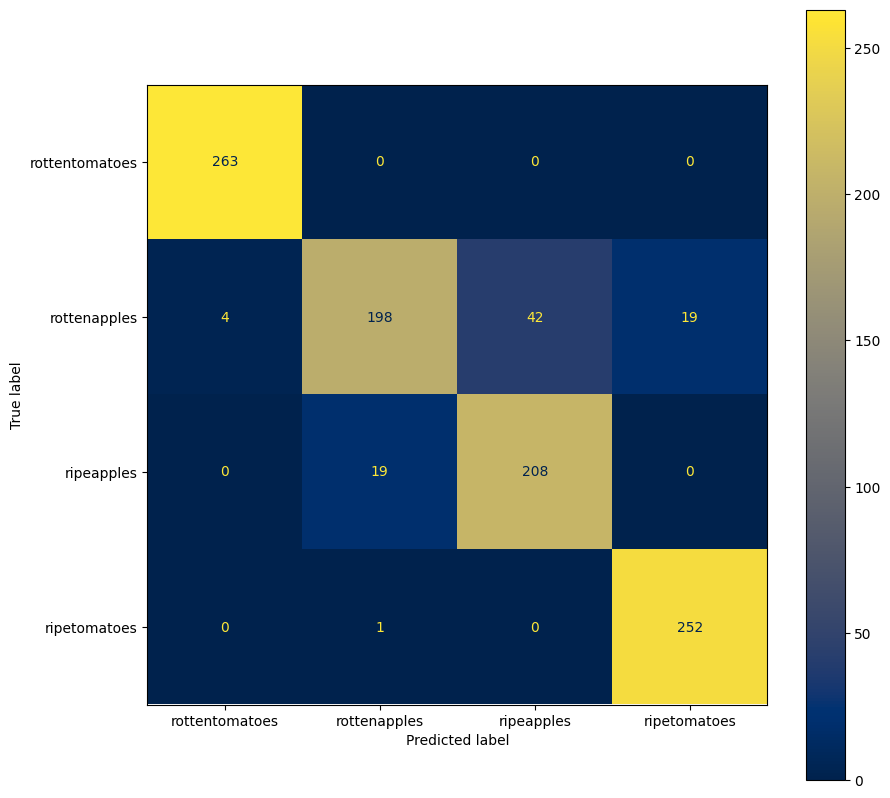

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(test_generator.classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap="cividis")